# Importação das libs

In [54]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Carregando dados

In [55]:
# Carregando os datasets com delimitadores específicos
imoveis_df = pd.read_csv("C:\\Users\\Matheus Poletto\\Desktop\\Cientista de Dados\\POS XP\\BOOTCAMP CDD\\DESF5\\precos_imoveis.csv", delimiter='|', encoding='ISO-8859-1')
estados_df = pd.read_csv("C:\\Users\\Matheus Poletto\\Desktop\\Cientista de Dados\\POS XP\\BOOTCAMP CDD\\DESF5\\estado_regiao.csv", delimiter=';', encoding='ISO-8859-1')

# Exibindo as primeiras linhas dos dados
print(imoveis_df.head())
print(estados_df.head())


   area  garagem  banheiros  lareira  marmore  andares  preco  id_estado
0    25        3          4        3        0        1  51875          7
1    35        1          3        1        0        0  17875         21
2   195        2          4        2        0        0  47075          8
3    33        2          2        1        0        1  38575         16
4    11        2          3        0        0        1  33775         14
   id_estado sigla    estado    regiao    pais
0          1    AC      Acre     Norte  Brasil
1          2    AL   Alagoas  Nordeste  Brasil
2          3    AP     Amapá     Norte  Brasil
3          4    AM  Amazonas     Norte  Brasil
4          5    BA     Bahia  Nordeste  Brasil


# Pergunta 1 - Durante a análise inicial dos dados, foram identificados dados duplicados no dataset?

In [56]:
# Verificando valores ausentes
print(imoveis_df.isnull().sum())
print(estados_df.isnull().sum())
print(f"O número de duplicatas na base de dados imoveis_df é: {imoveis_df.duplicated().sum()}.")
print(f"O número de duplicatas na base de dados estados_df é: {estados_df.duplicated().sum()}.")

area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
preco        0
id_estado    0
dtype: int64
id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64
O número de duplicatas na base de dados imoveis_df é: 72.
O número de duplicatas na base de dados estados_df é: 0.


In [57]:
# Tratando valores ausentes (se houver)
imoveis_df.fillna(imoveis_df.mean(), inplace=True)  # Preenchendo valores numéricos com a média
estados_df.fillna(estados_df.mode().iloc[0], inplace=True)  # Preenchendo valores categóricos com a moda

# Removendo duplicatas, se houver
imoveis_df.drop_duplicates(inplace=True)
estados_df.drop_duplicates(inplace=True)

# Verificando se os dados foram tratados corretamente
print(imoveis_df.isnull().sum())
print(estados_df.isnull().sum())


area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
preco        0
id_estado    0
dtype: int64
id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64


# Merge das tabelas

In [58]:
# Fazendo o merge das tabelas com base no id_estado
dados_completos = pd.merge(imoveis_df, estados_df, on='id_estado')

# Exibindo as primeiras linhas dos dados integrados
print(dados_completos.head())


   area  garagem  banheiros  lareira  marmore  andares  preco  id_estado  \
0    25        3          4        3        0        1  51875          7   
1    35        1          3        1        0        0  17875         21   
2   195        2          4        2        0        0  47075          8   
3    33        2          2        1        0        1  38575         16   
4    11        2          3        0        0        1  33775         14   

  sigla             estado        regiao    pais  
0    DF   Distrito Federal  Centro-Oeste  Brasil  
1    RS  Rio Grande do Sul           Sul  Brasil  
2    ES     Espírito Santo       Sudeste  Brasil  
3    PR             Paraná           Sul  Brasil  
4    PA               Pará         Norte  Brasil  


In [ ]:
# Verificando se há dados duplicados no dataset de imóveis
duplicados_imoveis = imoveis_df.duplicated().sum()
print(f"Número de dados duplicados no dataset de imóveis: {duplicados_imoveis}")

# Verificando se há dados duplicados no dataset de estados
duplicados_estados = estados_df.duplicated().sum()
print(f"Número de dados duplicados no dataset de estados: {duplicados_estados}")

# Pergunta 2 - Após todos os tratamentos e integração de dados, responda: qual é a média da área construída para os imóveis da região sudeste?

In [65]:
# Filtrando os imóveis que pertencem à região Sudeste
imoveis_sudeste = dados_completos[dados_completos['regiao'] == 'Sudeste']

# Calculando a média da área construída para os imóveis da região Sudeste
media_area_sudeste = imoveis_sudeste['area'].mean()

print(f"A média da área construída para os imóveis da região Sudeste é: {media_area_sudeste:.2f} m²")


A média da área construída para os imóveis da região Sudeste é: 124.14 m²


# Pergunta 3 - Crie um histograma que ilustre a distribuição do consumo dos clientes ao longo do tempo, empregando 20 barras para a análise. Posteriormente, selecione a opção que melhor se adequa aos dados apresentados.

In [66]:
dados_completos.head()

,area,garagem,banheiros,lareira,marmore,andares,preco,id_estado,sigla,estado,regiao,pais
0,25,3,4,3,0,1,51875,7,DF,Distrito Federal,Centro-Oeste,Brasil
1,35,1,3,1,0,0,17875,21,RS,Rio Grande do Sul,Sul,Brasil
2,195,2,4,2,0,0,47075,8,ES,Espírito Santo,Sudeste,Brasil
3,33,2,2,1,0,1,38575,16,PR,Paraná,Sul,Brasil
4,11,2,3,0,0,1,33775,14,PA,Pará,Norte,Brasil


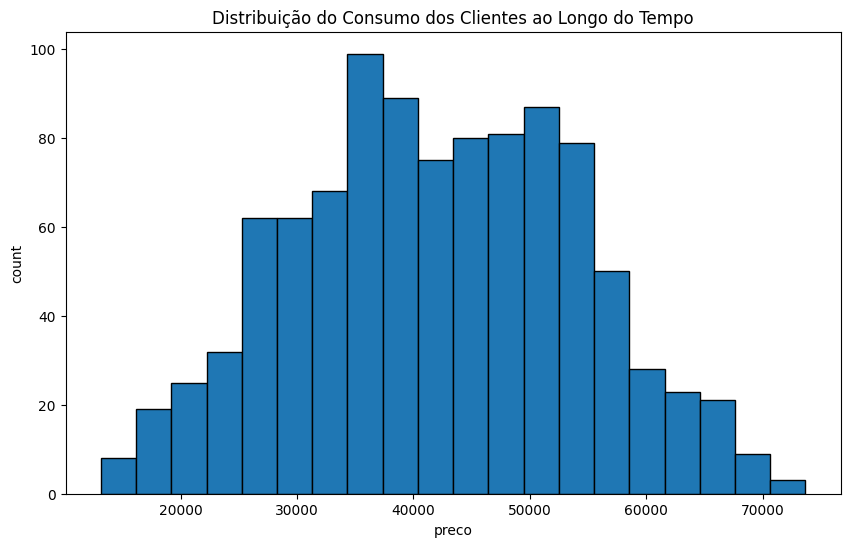

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Criando o histograma com 20 barras
plt.hist(dados_completos['preco'], bins=20, edgecolor='black')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição do Consumo dos Clientes ao Longo do Tempo')
plt.xlabel('preco')
plt.ylabel('count')

# Exibindo o histograma
plt.show()

# Pergunta 4 - Elabore um gráfico de dispersão que represente a relação entre a área e o preço, agrupados por andares. No eixo x, represente a área, enquanto no eixo y, represente os valores. Posteriormente, analise os resultados obtidos e selecione o gráfico que melhor ilustra essa relação.

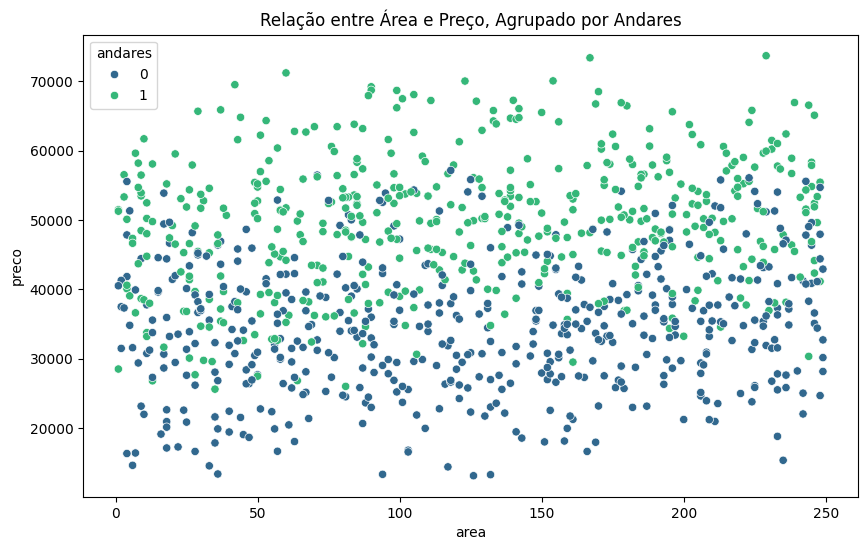

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))

# Usando seaborn para criar o gráfico de dispersão agrupado por andares
sns.scatterplot(data=dados_completos, x='area', y='preco', hue='andares', palette='viridis')

# Adicionando título e rótulos aos eixos
plt.title('Relação entre Área e Preço, Agrupado por Andares')
plt.xlabel('area')
plt.ylabel('preco')

# Exibindo o gráfico
plt.show()

# Pergunta 5 - Qual variável possui maior correlação com o valor do imóvel?

In [87]:
# Selecionando apenas as colunas numéricas para calcular a correlação
dados_numericos = dados_completos.select_dtypes(include=[np.number])

# Calculando a correlação entre todas as variáveis numéricas
correlacao = dados_numericos.corr()

# Exibindo a correlação da variável 'preco' com as outras variáveis
#print(correlacao['preco'].sort_values(ascending=False))

# Identificando a variável com a maior correlação com o preço
maior_correlacao = correlacao['preco'].sort_values(ascending=False).index[1]
print(f"A variável com maior correlação com o preço é: {maior_correlacao}.")


A variável com maior correlação com o preço é: andares.


# Pergunta 6 - Qual região possui a maior média de preço de imóveis?

In [90]:
# Calculando a média de preço de imóveis por região
media_preco_regiao = dados_completos.groupby('regiao')['preco'].mean()

# Exibindo a região com a maior média de preço
regiao_maior_media = media_preco_regiao.idxmax()
maior_media = media_preco_regiao.max()

print(f"A região com a maior média de preço de imóveis é: {regiao_maior_media} com uma média de preço de {maior_media:.2f}.")


A região com a maior média de preço de imóveis é: Centro-Oeste com uma média de preço de 43942.27.


# Pergunta 7 - Crie um gráfico de boxplot, onde o eixo y representa a variável preço e o eixo x representa o número de andares. Em seguida, escolha a melhor opção.

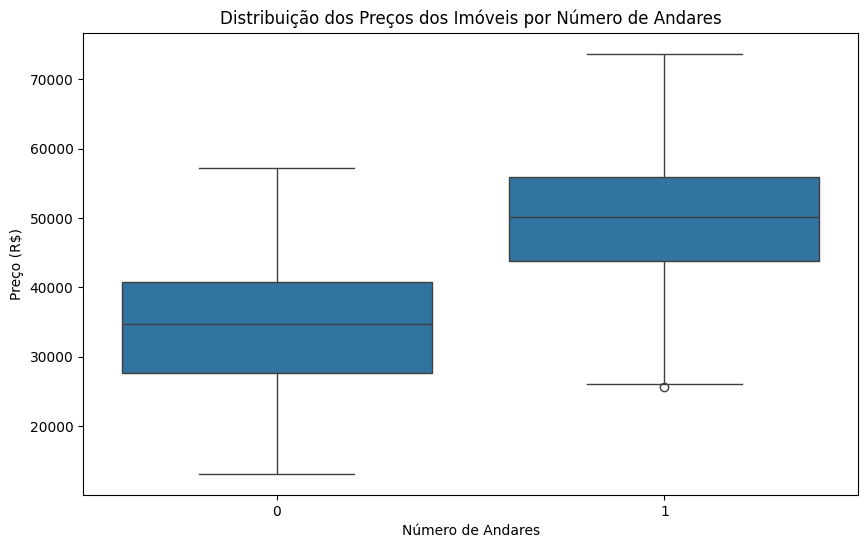

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o gráfico de boxplot com Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='andares', y='preco', data=dados_completos)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição dos Preços dos Imóveis por Número de Andares')
plt.xlabel('Número de Andares')
plt.ylabel('Preço (R$)')

# Exibindo o gráfico
plt.show()

# Pergunta 8 - Qual estado possui a maior média de preço de imóveis?


In [94]:
# Calculando a média de preço de imóveis por estado
media_preco_estado = dados_completos.groupby('estado')['preco'].mean()

# Exibindo o estado com a maior média de preço
estado_maior_media = media_preco_estado.idxmax()
maior_media = media_preco_estado.max()

print(f"O estado com a maior média de preço de imóveis é: {estado_maior_media} com uma média de preço de {maior_media:.2f}.")


O estado com a maior média de preço de imóveis é: Amapá com uma média de preço de 49357.58.


# Pergunta 9 - Ao aplicar um modelo de regressão linear usando machine learning, responda à seguinte pergunta: qual é o preço predito para os dados de entrada abaixo?

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecionando as variáveis preditoras (features) e a variável alvo (preço)
X = dados_completos[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]
y = dados_completos['preco']

# Dividindo os dados em conjunto de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treinamento
modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Dados de entrada fornecidos na pergunta
entrada = pd.DataFrame({
    'area': [50],
    'garagem': [1],
    'banheiros': [2],
    'lareira': [0],
    'marmore': [0],
    'andares': [1]
})

# Fazendo a predição com o modelo treinado
preco_predito = modelo.predict(entrada)

print(f"O preço predito para o imóvel é: R$ {preco_predito[0]:.2f}")


O preço predito para o imóvel é: R$ 40419.12


# Pergunta 10 - Ao aplicar um modelo de regressão linear usando machine learning, responda à seguinte pergunta: qual é o preço predito para os dados de entrada abaixo?


In [ ]:
# Dados de entrada fornecidos na Pergunta 10
entrada_10 = pd.DataFrame({
    'area': [5000],
    'garagem': [3],
    'banheiros': [4],
    'lareira': [1],
    'marmore': [1],
    'andares': [3]
})

# Fazendo a predição com o modelo treinado
preco_predito_10 = modelo.predict(entrada_10)

print(f"O preço predito para o imóvel é: R$ {preco_predito_10[0]:.2f}")


O preço predito para o imóvel é: R$ 204048.49


# Pergunta 11 - Qual é o valor do coeficiente angular da reta para variável andares?

In [ ]:
# Verificando os coeficientes do modelo treinado
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])

# Exibindo o coeficiente da variável 'andares'
coef_andares = coeficientes.loc['andares', 'Coeficiente']
print(f"O coeficiente angular da reta para a variável andares é: {coef_andares:.4f}")


O coeficiente angular da reta para a variável andares é: 15801.9267


# Pergunta 12 - Qual foi o coeficiente de determinação R² do modelo?

In [ ]:
# Calculando o R² no conjunto de teste
r2 = modelo.score(X_test, y_test)

print(f"O coeficiente de determinação R² do modelo é: {r2:.4f}")


O coeficiente de determinação R² do modelo é: 0.6149


# Pergunta 13 - Qual o valor do mean absolute error do modelo criado?

In [ ]:
from sklearn.metrics import mean_absolute_error

# Fazendo as previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando o Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"O valor do Mean Absolute Error (MAE) do modelo é: {mae:.2f}")


O valor do Mean Absolute Error (MAE) do modelo é: 6098.97


# Criação de visualização

In [95]:
pip install streamlit

  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 3.0 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.7 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.7 MB 6.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/8.7 MB 9.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.0/8.7 MB 16.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.7 MB 24.9 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 29.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/658.1 kB ? eta -:--:--
   --------------------------------------- 658.1/658.1 kB 20.2 MB/s eta 0:00:00
   ----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
